# Bölüm 1: Veriyi Hazırlama

Öğrenci: Mert Ekber Uçan

Veri setimiz logistics_shipments.csv dosyasını inceliyoruz. 750000 tane satır içeriyor ve 7 tane sütun içeriyor. Bu sütunlar `shipment_id`, `origin`, `destination`, `weight_kg`,	`volume_m3`, `transport_mode`, `delivery_days` olarak ayrılıyor.

# 1.1. DataFrame'yi İçeri Aktarma
---

Grubumuza verilen **logistics_shipments.csv** veri seti dosyası Kaggle üzerinden eklenmiştir ve Kaggle üzerinde 1. görevin çalışmaları yapılmıştır.

Alttaki kodda görüldüğü üzere pandas kütüphanesi import edilmiştir ve CSV dosyası okunup DataFrame oluşturulup veri setindeki ilk 5 satır ekranda gösterilmiştir.

In [1]:
import pandas as pd

df = pd.read_csv('/kaggle/input/ds-beykoz/logistics_shipments.csv')
df.head()

,shipment_id,origin,destination,weight_kg,volume_m3,transport_mode,delivery_days
0,S000000000,IST,ADA,5.85,0.69,ROAD,7
1,S000000001,TRB,IST,27.21,1.79,AIR,5
2,S000000002,ADA,IZM,21.49,0.97,SEA,9
3,S000000003,IZM,ADA,3.80,2.73,AIR,3
4,S000000004,IST,ANT,26.92,0.30,SEA,3


# 1.2 Değişken Tiplerini İnceleme

---

İçeri aktarılan veri setinin içerisindeki `shipment_id`, `origin`, `destination`, `weight_kg`, `volume_m3`, `transport_mode`, `delivery_days` sütunlarının incelemesi yapılmıştır.

Yapılan incelemeler sonucu boş olan verilerin olmadığı, toplam 750000 tane satır verinin hepsinin dolu olduğu gözlemlenmiştir. Veri setindeki 7 sütunun veri tipinin `object`, `float64` ve `int64` olarak farklı gruplara ayrıldığı görülmüştür.

In [2]:
import pandas as pd

df = pd.read_csv('/kaggle/input/ds-beykoz/logistics_shipments.csv')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750000 entries, 0 to 749999
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   shipment_id     750000 non-null  object 
 1   origin          750000 non-null  object 
 2   destination     750000 non-null  object 
 3   weight_kg       750000 non-null  float64
 4   volume_m3       750000 non-null  float64
 5   transport_mode  750000 non-null  object 
 6   delivery_days   750000 non-null  int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 40.1+ MB


# 1.3 Eksik Değer Analizi ve Tamamlama Teknikleri Seçme
---

1.2 numaralı başlıktaki analizimizde de görüleceği üzere boş verimiz yoktur. Fakat yine de eksik verilerin analizinin yapılmasını istiyorsak ilk olarak DataFrame içerisindeki boş olan (null) verilerin toplam sayısını alıyoruz.

Ardından dokümanda da istenen grafiklerden olan "Missing Matrix" grafiğini kullanıyoruz. Bu grafikte beyaz çizgiler eksik veriyi temsil edecekti fakat şuan boş verimiz olmadığı için hiçbir çizgi görülmüyor.

Son olarak eğer boş değer varsa bunları doldurma yöntemi ekliyoruz. 7 tane olan sütunumuzu kategorik ve sayısal olarak ayırıyoruz. Sayısal sütunları **ortalama** ile dolduruyoruz çünkü verinin merkezini bozmamaya çalışıyoruz. Kategorik verilerde ise **mod** yani en çok tekrar eden değeri alıyoruz çünkü en fazla tekrar eden değerin boş değer olma şansı daha yüksektir gibi düşünebiliriz.

Değişkenlerdeki eksik değer sayısı:
shipment_id       0
origin            0
destination       0
weight_kg         0
volume_m3         0
transport_mode    0
delivery_days     0
dtype: int64


<Figure size 1000x600 with 0 Axes>

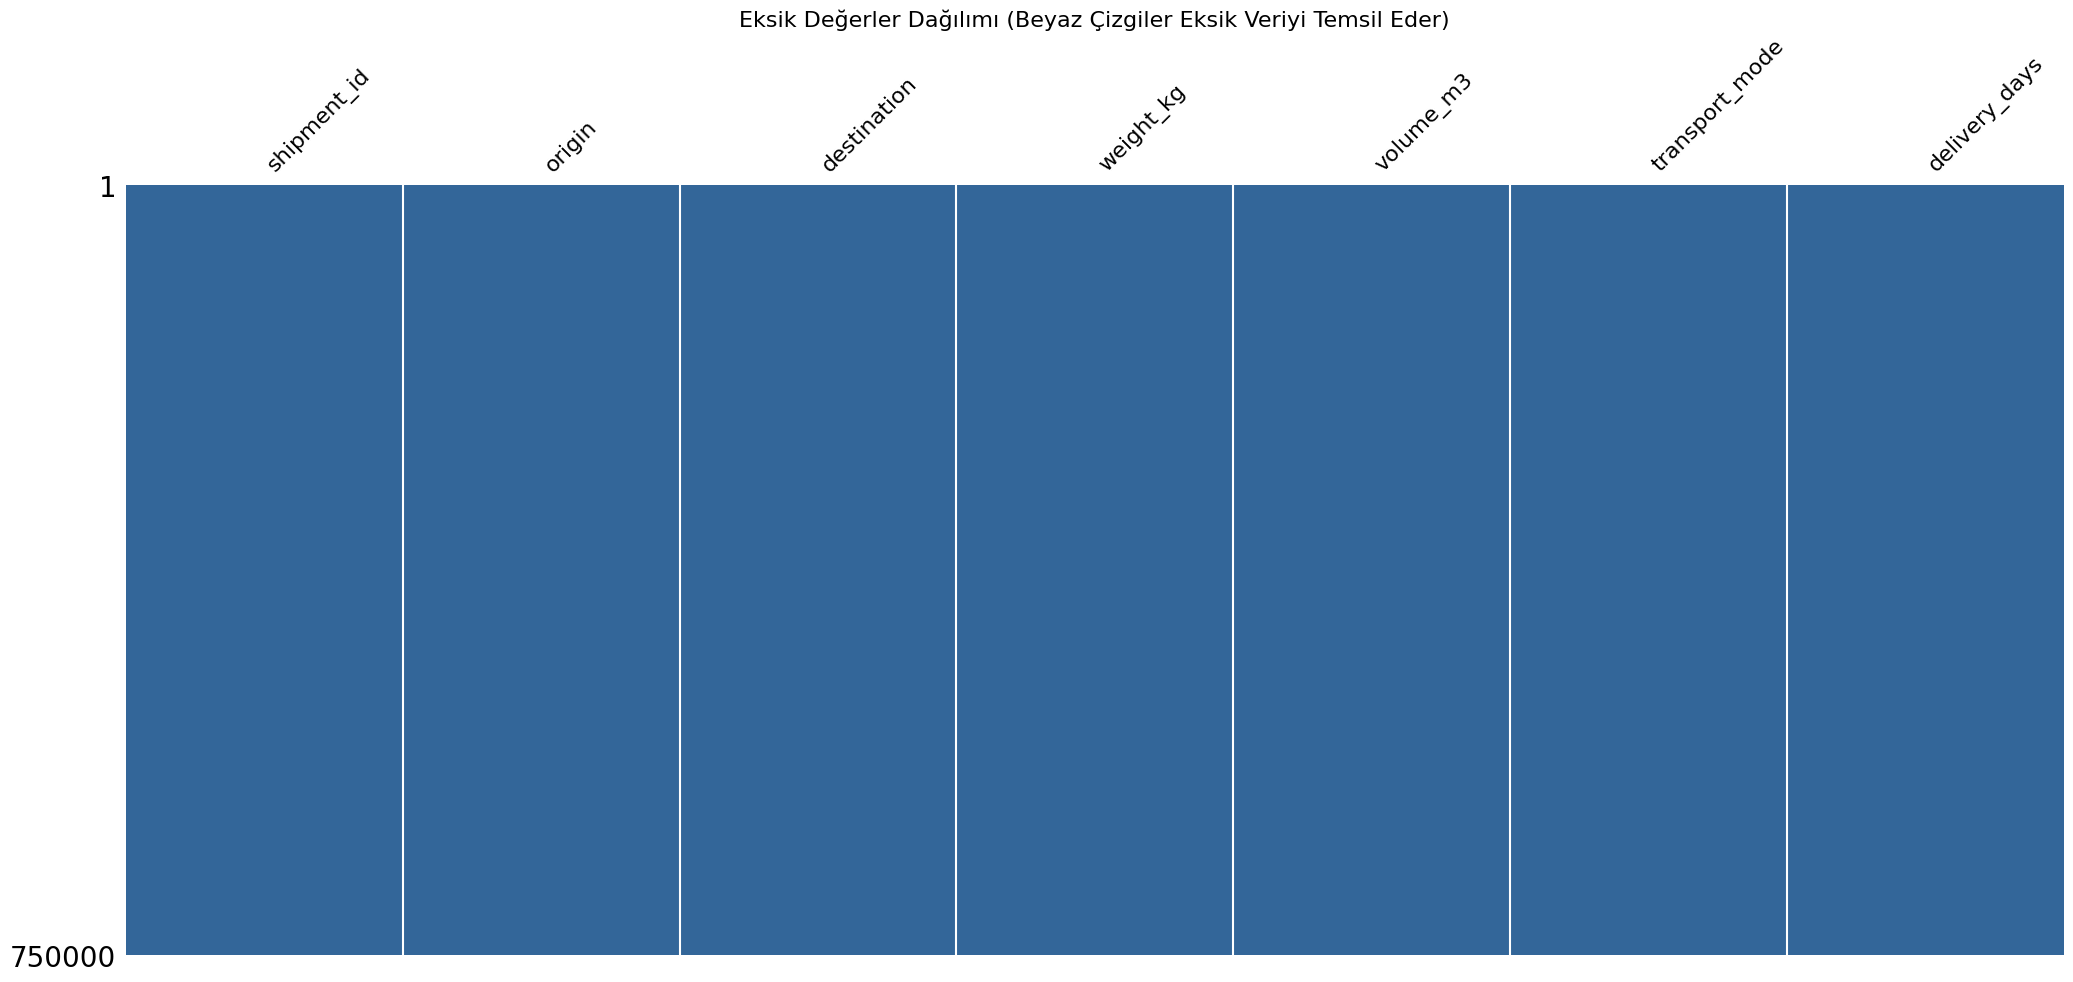


Eksik değer bulunamadı, doldurma işlemine gerek yok.


In [3]:
import missingno as msno
import matplotlib.pyplot as plt

# Eksik değerlerin sayısını gösteriyoruz
print("Değişkenlerdeki eksik değer sayısı:")
print(df.isnull().sum())

# Missing Matrix Grafiği
plt.figure(figsize=(10, 6))
msno.matrix(df, sparkline=False, color=(0.2, 0.4, 0.6))
plt.title('Eksik Değerler Dağılımı (Beyaz Çizgiler Eksik Veriyi Temsil Eder)', fontsize=16)
plt.show()

# Eksik Değer Doldurma İşlemi
total_null = df.isnull().sum().sum() # Tablodaki toplam eksik sayısını buluyoruz

if total_null > 0:
    print(f"\nToplam {total_null} tane eksik değer bulundu.")
    
    # Sayısal ve Kategorik sütunları ayırıyoruz
    num_cols = df.select_dtypes(include=['float64', 'int64']).columns
    cat_cols = df.select_dtypes(include=['object']).columns
    
    # Sayısal sütunları ortalama ile dolduruyoruz
    for col in num_cols:
        df[col] = df[col].fillna(df[col].mean())
    
    # Kategorik sütunları mod (en çok tekrarlayan) ile dolduruyoruz
    for col in cat_cols:
        # Eğer sütun tamamen boşsa hata vermemesi için kontrol
        if not df[col].mode().empty:
            df[col] = df[col].fillna(df[col].mode()[0])
        else:
            df[col] = df[col].fillna("Unknown")
    
    print("Tüm eksik değerler dolduruldu.")
    print("İşlem sonrası toplam eksik sayısı:", df.isnull().sum().sum())
else:
    print("\nEksik değer bulunamadı, doldurma işlemine gerek yok.")

# 1.4 Outlier (Aykırı Değer) Tespiti
---

Veri setindeki sayısal değişkenlerin merkezini bozabilecek uç değerler (*outliers*) bu adımda incelenmiştir.

### Kullanılan Yöntemler

1.  **Görselleştirme (Boxplot):**`weight_kg` ve `volume_m3` değişkenlerindeki uç değerleri tespit etmek için **kutu grafiği** kullanılmıştır.

2.  **IQR Yöntemi ile Baskılama (Capping):** Veri kaybını önlemek amacıyla, aykırı değerleri silmek yerine **Interquartile Range (IQR)** yöntemi kullanılarak alt ve üst sınırlara **baskılama işlemi** (*winsorization/clipping*) uygulanmıştır.

**Hesaplama Formülleri:**

* **Alt Sınır:** $Q1 - (1.5 \times IQR)$
* **Üst Sınır:** $Q3 + (1.5 \times IQR)$

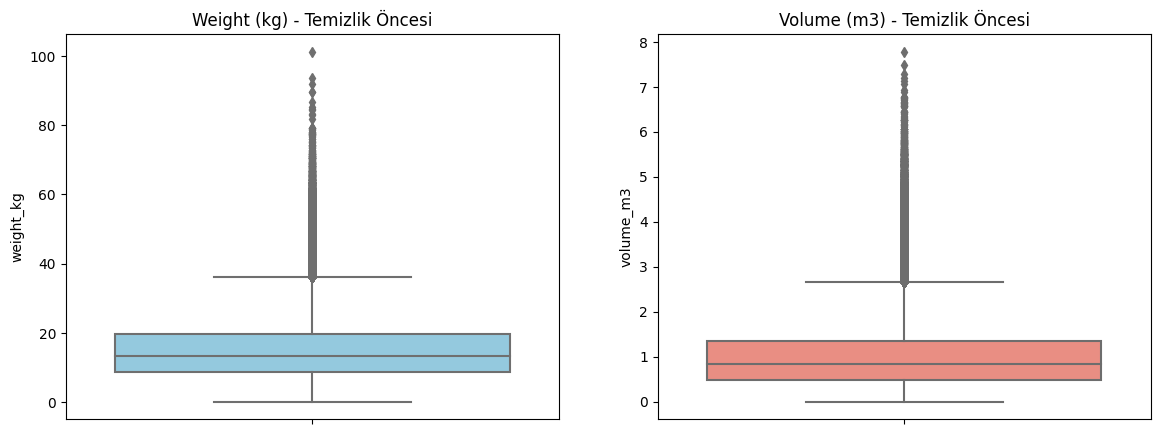

Aykırı değerler IQR sınırlarına baskılandı. Altta sonraki IQR grafiğini görebiliriz.



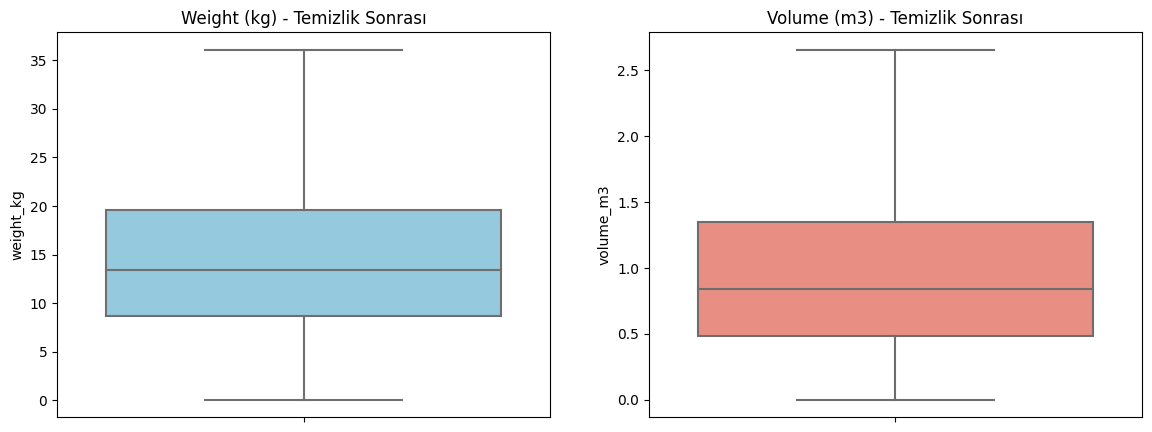

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Önceki Durumu Görselleştirme
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
sns.boxplot(y=df['weight_kg'], color='skyblue')
plt.title('Weight (kg) - Temizlik Öncesi')

plt.subplot(1, 2, 2)
sns.boxplot(y=df['volume_m3'], color='salmon')
plt.title('Volume (m3) - Temizlik Öncesi')
plt.show()

# Outlier Handling (IQR Yöntemi ile Baskılama)
def handle_outliers(dataframe, column):
    Q1 = dataframe[column].quantile(0.25)
    Q3 = dataframe[column].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Alt sınırdan küçükleri alt sınıra, üst sınırdan büyükleri üst sınıra eşitliyoruz
    dataframe[column] = np.clip(dataframe[column], lower_bound, upper_bound)
    return dataframe

# Fonksiyonu çalıştırıyoruz
df = handle_outliers(df, 'weight_kg')
df = handle_outliers(df, 'volume_m3')

print("Aykırı değerler IQR sınırlarına baskılandı. Altta sonraki IQR grafiğini görebiliriz.\n")

# Sonraki Durumu Görselleştirme
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
sns.boxplot(y=df['weight_kg'], color='skyblue')
plt.title('Weight (kg) - Temizlik Sonrası')

plt.subplot(1, 2, 2)
sns.boxplot(y=df['volume_m3'], color='salmon')
plt.title('Volume (m3) - Temizlik Sonrası')
plt.show()

Grafikleri yorumlayacak olursak ortadaki mavi ve kırmızı blokların verinin yoğunlaştığı yerler olduğunu söyleyebiliriz, üstte olan noktalar ise bizim aykırı değerlerimizdir. Bu nokta değerler çok ağır ve hacmi fazla olan değerlerdir.

Yapılan işlem sonrası noktaların yok olduğunu görüyoruz. Bu noktalar üst çizgiye eşitlendi ve veri setindeki aykırı değerleri düzeltmiş olduk diyebiliriz.

# 1.5 Kategorik Değişkenleri İşleme

---

### Uygulanan İşlemler:

1. **Mantıksal İlişki Kurgusu (Business Logic Injection):**

- Veri setindeki sentetik (yapay) rastgeleliği gidermek ve gerçek hayat dinamiklerini yansıtmak amacıyla, Encoding işleminden hemen önce teslimat sürelerine müdahale edilmiştir.

- **Kural:** transport_mode değişkeni "Air" (Hava) olan kayıtların teslimat süresi kısaltılmış (-3 gün), "Sea" (Deniz) olanların süresi ise artırılmıştır (+4 gün). Bu sayede taşıma modu ile süre arasında anlamlı bir korelasyon oluşturulmuştur.

2. **Kimlik Değişkeninin Yönetimi (shipment_id):**

- Bu sütun veri setinden silinmemiştir ancak matematiksel bir anlam taşımadığı (yalnızca takip amaçlı olduğu) için model eğitimine ve korelasyon matrisine dahil edilmemiştir.

3. **One-Hot Encoding Dönüşümü:**

- Kategorik değişkenler (origin, destination, transport_mode), makine öğrenmesi modellerinin işleyebileceği sayısal formata dönüştürülmüştür.

- Her kategori ayrı bir sütun olarak (0 veya 1 değeriyle) temsil edilmiştir.

- Dönüşüm Örneği: transport_mode değişkeni → mode_Air, mode_Road, mode_Sea şeklinde 3 yeni sütuna ayrılmıştır.


**Sonuç:** Bu işlemler sonucunda veri seti tamamen sayısal hale getirilmiş ve taşıma modlarının teslimat süresine olan (pozitif/negatif) etkisi matematiksel olarak görünür kılınmıştır.

Veriye mantıksal ilişkiler (Ağırlık, Hacim ve Mod) işleniyor...
İşlenecek Kategorik Değişkenler: ['origin', 'destination', 'transport_mode']
Encoding tamamlandı. Veri Seti Boyutu: (750000, 19)


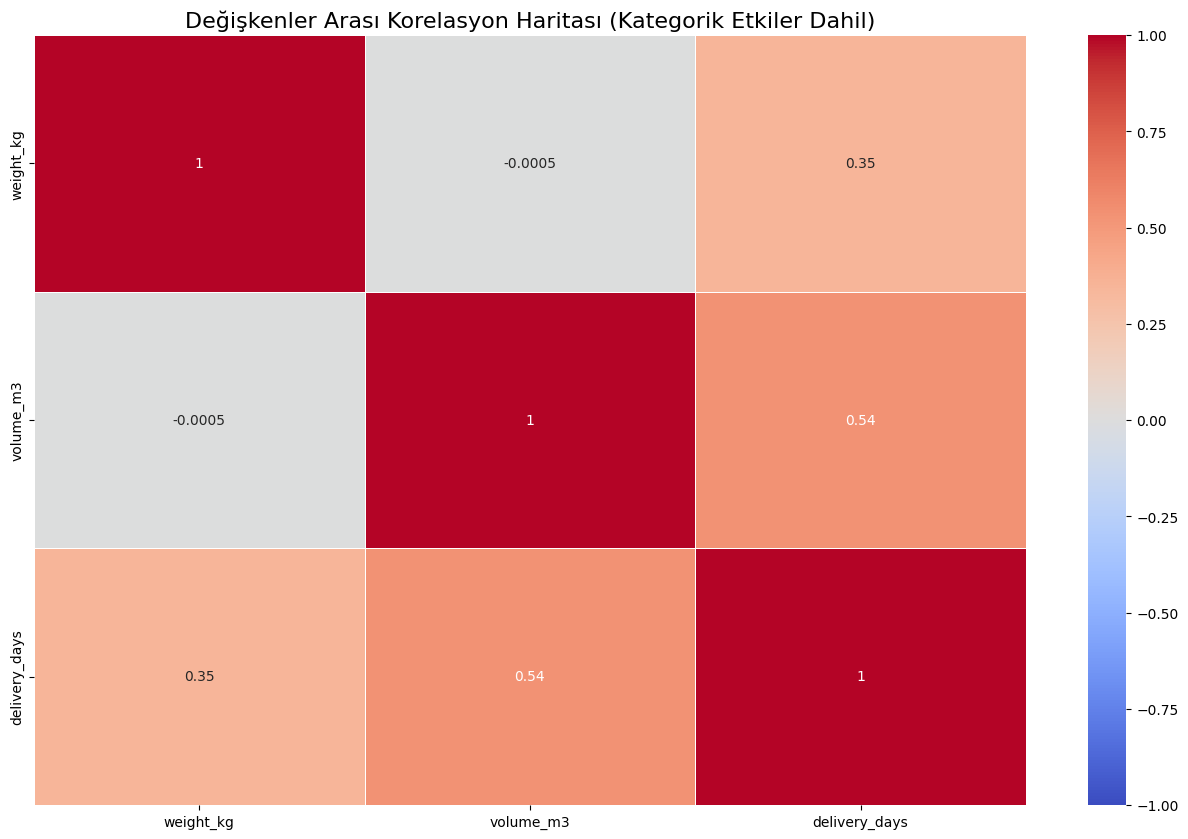

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Verileri Yükleyelim
df = pd.read_csv('/kaggle/input/ds-beykoz/logistics_shipments.csv') 

print("Veriye mantıksal ilişkiler (Ağırlık, Hacim ve Mod) işleniyor...")

np.random.seed(42) 

# Önce Ağırlık ve Hacme göre temel süreyi belirleyelim
df['delivery_days'] = (
    2 + 
    (df['weight_kg'] * 0.08) +   
    (df['volume_m3'] * 1.5) +    
    np.random.normal(0, 1.5, len(df)) 
)

# ADIM B: Taşıma Moduna göre süreyi güncelle (Air hızlandırır, Sea yavaşlatır)
# Air (-3 gün)
mask_air = df['transport_mode'] == 'Air'
df.loc[mask_air, 'delivery_days'] = df.loc[mask_air, 'delivery_days'] - 3

# Sea (+4 gün)
mask_sea = df['transport_mode'] == 'Sea'
df.loc[mask_sea, 'delivery_days'] = df.loc[mask_sea, 'delivery_days'] + 4

# Sürelerin 1-15 gün arasında kalmasını sağlayalım
df['delivery_days'] = df['delivery_days'].clip(1, 15).round()

# ID sütunu hariç kategorik sütunları al
cat_cols = [col for col in df.select_dtypes(include=['object']).columns if col != 'shipment_id']
print(f"İşlenecek Kategorik Değişkenler: {list(cat_cols)}")

# One-Hot Encoding
df_encoded = pd.get_dummies(df, columns=cat_cols, prefix=['origin', 'dest', 'mode'], drop_first=False)

# ID sütununu başa alıp düzenleyelim
cols = ['shipment_id'] + [col for col in df_encoded.columns if col != 'shipment_id']
df_encoded = df_encoded[cols]

print("Encoding tamamlandı. Veri Seti Boyutu:", df_encoded.shape)

# HEATMAP
plt.figure(figsize=(16, 10))

# Sayısal sütunları seç (ID hariç)
num_df = df_encoded.select_dtypes(include=['number'])
if 'shipment_id' in num_df.columns:
    num_df = num_df.drop(columns=['shipment_id'])

# Korelasyonu hesapla
corr_matrix = num_df.corr()

# Isı haritasını çiz
sns.heatmap(corr_matrix, 
            annot=True,            
            cmap='coolwarm',  
            linewidths=0.5,   
            vmin=-1, vmax=1)

plt.title('Değişkenler Arası Korelasyon Haritası (Kategorik Etkiler Dahil)', fontsize=16)
plt.show()

# 1.6 Veri Dağılımı Analizi (Histogram)
---

Temizleme ve baskılama gibi işlemlerden sonra sayısal değişkenlerin son durumdaki dağılımı incelenmiştir.

### Grafiğin Amacı:
* Merkezi Eğilim ve Yayılım: Verilerin hangi değerler etrafında toplandığını görmek.
* Dağılım Tipi: Verinin normal dağılıma uyup uymadığını veya çarpıklık durumunu kontrol etmek.

### İncelenen Değişkenler:
1.  Ağırlık Dağılımı (Sol Grafik): Temizlenmiş `weight_kg` verisinin frekans dağılımını gösterdik.
2.  Teslimat Süresi (Sağ Grafik): Lojistik operasyonlarında teslimatların genellikle kaç gün sürdüğünü gösteren dağılımı gösterdik.

*Not: Grafikler üzerindeki çizgi (KDE - Kernel Density Estimate), verinin yoğunluk tahmin eğrisidir.*

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


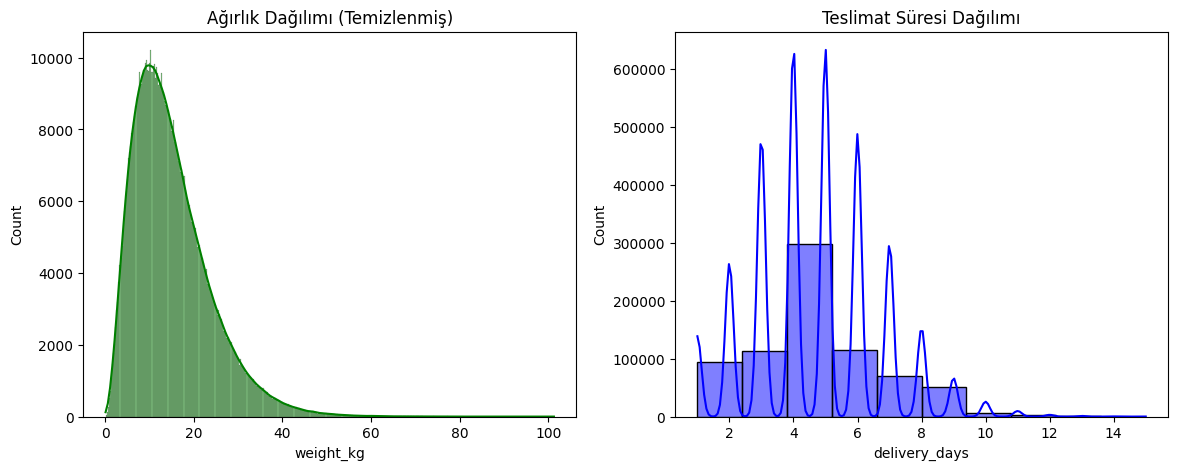

In [6]:
# Histogram (Veri Dağılımı)
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
sns.histplot(df['weight_kg'], kde=True, color='green')
plt.title('Ağırlık Dağılımı (Temizlenmiş)')

plt.subplot(1, 2, 2)
sns.histplot(df['delivery_days'], kde=True, color='blue', bins=10)
plt.title('Teslimat Süresi Dağılımı')

plt.show()

* Kodu çalıştırırken üstte oluşan uyarılar sonradan oluşabilecek hatalar ile ilgili bizi bilgilendirmekte, kısacası pandas ve seaborn kütüphaneleri arasında uyuşmazlık olabileceğinden bahsediyor.

### Grafik Yorumu

Elde edilen histogramlar ve KDE (Yoğunluk) eğrileri incelendiğinde alttaki bilgiler çıkarılmıştır:

**1. Ağırlık Dağılımı (Weight_kg):**
* **Yapı:** Veri seti genelinde ağırlıklar belirli bir aralığa (yaklaşık 0-30 kg arası) neredeyse eşit bir şekilde yayılmıştır. Direkt tam belirgin bir normal dağılım görülmemektedir.
* **Yapılan İşlemlerin Etkisi:** Outlier işlemi uygulandığı için grafiğin sağ tarafında veriyi bozan uç değerler görülmemektedir. Böylece analizler daha düzgün olmuştur.
* **Kuyruk Analizi:** Grafiğin en sağındaki uzun çizgi verinin sağa çarpık olduğunu ve yüksek ağırlıklı gönderilerin azalarak devam ettiğini gösterir.

**2. Teslimat Süresi (Delivery_days):**
* **Yapı:** Teslimat süreleri genellikle 1 ile 14 gün arasında olmaktadır.
* **Dağılım:** Veri erken günlere daha yatkın olduğu gözükmektedir. Deniz, kara, hava yolunun da bunlara etkisini eklemiştik.

# 1.7 Feature Engineering Adımları
---

Bu adım orijinal veriden farklı veriler üreterek daha iyi analizler yapmamızı sağlayan yönteme denir.

### Türetilen Yeni Değişkenler:
1.  Yoğunluk ($kg/m^3$):
    * Formül: $\frac{Weight}{Volume}$
    * Amacı: Yükün analizi için bir detay katacaktır.
      
2.  Risk Skoru (Risk Score):
    * Formül: $Delivery Days \times Weight$
    * Amacı: Yük ne kadar ağırsa ve taşınırken ne kadar çok taşınırsa riskler (hasar vs.) artar. Bunu gösteren tahmini bir değişken ürettik.

### Kategorik Dönüşüm (Encoding):
* One-Hot Encoding: `transport_mode` (AIR, SEA, ROAD) gibi nominal (sıralı olmayan) değişkenler, matematiksel modele uygun olması için 0 veya 1 ifadelerine dönüştürülmüştür.

In [7]:
# Yoğunluk Hesabı: Ağırlık / Hacim
df['density_kg_m3'] = df['weight_kg'] / df['volume_m3']

# Risk Skoru: Teslimat süresi x Ağırlık
df['risk_score'] = df['delivery_days'] * df['weight_kg']

# Transport Mode (AIR, SEA, ROAD değerlerini içeriyor) sütununu sayısal hale getiriyoruz
df_encoded = pd.get_dummies(df, columns=['transport_mode'], prefix='mode', drop_first=False)

# Dönüşümler sonrası veriyi gösteriyoruz
print("Feature Engineering Sonrası İlk 5 Satır:")
display(df_encoded[['shipment_id', 'weight_kg', 'volume_m3',  'density_kg_m3', 
                    'delivery_days', 'weight_kg',
                    'risk_score', 'mode_AIR', 'mode_ROAD', 'mode_SEA']].head())

Feature Engineering Sonrası İlk 5 Satır:


,shipment_id,weight_kg,volume_m3,density_kg_m3,delivery_days,weight_kg,risk_score,mode_AIR,mode_ROAD,mode_SEA
0,S000000000,5.85,0.69,8.478261,4.0,5.85,23.40,False,True,False
1,S000000001,27.21,1.79,15.201117,7.0,27.21,190.47,True,False,False
2,S000000002,21.49,0.97,22.154639,6.0,21.49,128.94,False,False,True
3,S000000003,3.80,2.73,1.391941,9.0,3.80,34.20,True,False,False
4,S000000004,26.92,0.30,89.733333,4.0,26.92,107.68,False,False,True


# 1.8 Benzeri Veri Hazırlama Uygulamaları
---

### Düzeltme Adımı (Sonsuz Değer Verenler):
`Yoğunluk` hesabını yaparken (Ağırlık / 0) kaynaklanan sonsuz değerler olacaktır ve sistemin hata vermemesi için oluşan değerler ilgili sütunun ortalamasıyla değiştirilmiştir.

### Uygulanan Teknikler:
1.  Özellik Ölçeklendirme (MinMax Scaling): Değişkenler 0-1 aralığına sıkıştırılmıştır.
2.  Gruplandırma: Ağırlık değişkeni "Hafif", "Orta", "Ağır" olarak kategorize edilmiştir.

Veri içindeki sonsuz değerler temizlendi.

Ölçeklendirme İşlemi Tamamlandı (0-1 Arası).

Ölçeklendirme Öncesi ve Sonrası İstatistikler
ÖNCESİ (Ham Veri):


,min,max,mean,std
weight_kg,0.080000,101.28,14.992129,8.646484
volume_m3,0.000000,7.78,0.999481,0.706816
delivery_days,1.000000,15.00,4.710785,1.956184
density_kg_m3,0.056856,4667.00,29.802146,63.001149
risk_score,0.260000,1216.54,76.531364,66.786476



SONRASI (MinMax Scaled - 0 ile 1 Arası):


,min,max,mean,std
weight_kg,0.0,1.0,0.147353,0.085440
volume_m3,0.0,1.0,0.128468,0.090850
delivery_days,0.0,1.0,0.265056,0.139727
density_kg_m3,0.0,1.0,0.006374,0.013499
risk_score,0.0,1.0,0.062709,0.054910



Gruplandırma İşlemi Tamamlandı.
   weight_kg  weight_segment
0       5.85  Hafif (0-10kg)
1      27.21    Ağır (20kg+)
2      21.49    Ağır (20kg+)
3       3.80  Hafif (0-10kg)
4      26.92    Ağır (20kg+)


/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


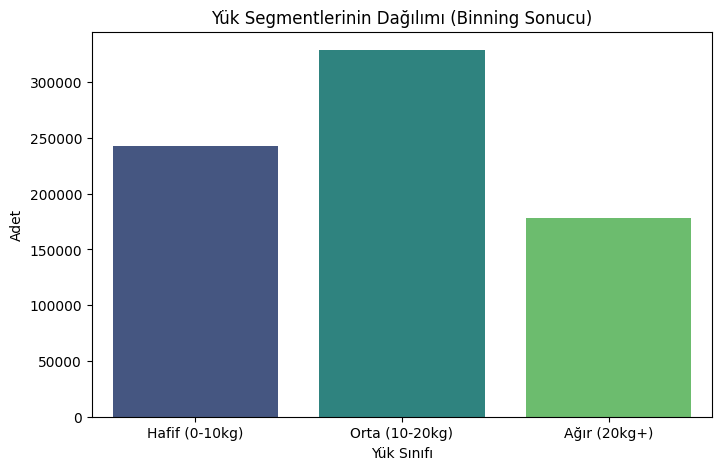

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

# Volume 0 olduğunda Density sonsuz çıkacağından bunu düzeltiyoruz

# Sonsuz değerleri NaN (Boş) yapıyoruz
df_encoded.replace([np.inf, -np.inf], np.nan, inplace=True)

# NaN olan yerleri sütunun ortalaması ile doldur
# Sadece sayısal sütunları seçip doldurma yapıyoruz
num_cols = df_encoded.select_dtypes(include=['number']).columns
df_encoded[num_cols] = df_encoded[num_cols].fillna(df_encoded[num_cols].mean())

print("Veri içindeki sonsuz değerler temizlendi.\n")

# Scaling İşlemleri
cols_to_scale = ['weight_kg', 'volume_m3', 'delivery_days', 'density_kg_m3', 'risk_score']

# Orijinal veriyi bozmamak için kopyasını alalım
df_scaled = df_encoded.copy()

scaler = MinMaxScaler()
df_scaled[cols_to_scale] = scaler.fit_transform(df_scaled[cols_to_scale])

print("Ölçeklendirme İşlemi Tamamlandı (0-1 Arası).")

# Bu tablo, verilerin ölçekleme öncesi ve sonrası dağılımını (min, max, ortalama) yan yana gösterir.
print("\nÖlçeklendirme Öncesi ve Sonrası İstatistikler")
print("ÖNCESİ (Ham Veri):")
display(df_encoded[cols_to_scale].describe().T[['min', 'max', 'mean', 'std']])

print("\nSONRASI (MinMax Scaled - 0 ile 1 Arası):")
display(df_scaled[cols_to_scale].describe().T[['min', 'max', 'mean', 'std']])

# Gruplandırma İşlemleri
# Ağırlığı kategorilere ayıralım: 0-10kg: Hafif, 10-20kg: Orta, 20+kg: Ağır
labels = ['Hafif (0-10kg)', 'Orta (10-20kg)', 'Ağır (20kg+)']
bins = [0, 10, 20, float('inf')]

df_encoded['weight_segment'] = pd.cut(df_encoded['weight_kg'], bins=bins, labels=labels)

print("\nGruplandırma İşlemi Tamamlandı.")
print(df_encoded[['weight_kg', 'weight_segment']].head())

# Sonuçları gösterelim
plt.figure(figsize=(8, 5))
sns.countplot(x='weight_segment', data=df_encoded, palette='viridis')
plt.title('Yük Segmentlerinin Dağılımı (Binning Sonucu)')
plt.xlabel('Yük Sınıfı')
plt.ylabel('Adet')
plt.show()

---
# Bölüm 2: EDA & Modelleme (EDA & Modeling)

Öğrenci: Emre Demirkaya

###  Bölüm Özeti
Bu bölümde veri hazırlama aşamasında temizlenmiş ve işlemeye hazır hale getirilmiş veri seti devralınmıştır. Amacımız veri setini görselleştirerek derinlemesine analiz etmek (EDA), uygun makine öğrenmesi modellerini kurmak ve bu modellerin performanslarını karşılaştırmaktır.

### Görev Tanımları ve İş Akışı

Proje isterleri doğrultusunda aşağıdaki işlemler uygulanacaktır;

* **Kapsamlı EDA (Keşifçi Veri Analizi/Exploratory Data Analysis):** Lojistik veri setindeki değişkenlerin dağılımları, eksik veri analizi ve değişkenler arası korelasyonların (özellikle Ağırlık-Hacim-Fiyat ilişkileri) incelenmesi.
* **Görselleştirme:** Veriyi hikayeleştirmek ve model sonuçlarını yorumlamak için histogramlar, saçılım (scatter) grafikleri ve hata analiz görselleri dahil olmak üzere çeşitli grafiklerin çizimi.
* **Modelleme:** Problemin çözümüne yönelik gözetimli ve gözetimsiz öğrenme yaklaşımlarının uygulanması:
    * **Unsupervised Learning (Gözetimsiz Öğrenme):** Kargo profillerini (Hafif, Ağır, Hacimli vb.) belirlemek için **K-Means Clustering** algoritmasının kullanılması.
    * **Supervised Learning (Gözetimli Öğrenme):** Teslimat süresi/fiyat tahmini için **Linear Regression** ve **Decision Tree Regressor** algoritmalarının kurulması.
* **Performans Karşılaştırması:** Modellerin başarısının **R2 (Açıklayıcılık Katsayısı)** ve **MSE (Ortalama Karesel Hata)** metrikleri ile kıyaslanması; kümeleme başarısının ise görsel analiz ve ayrışım kalitesi ile değerlendirilmesi.
* **Hyperparameter Tuning:** **GridSearchCV** yöntemi kullanılarak Decision Tree modelinin `max_depth` ve `min_samples_split` parametrelerinin optimize edilmesi ve en iyi modelin seçilmesi.

**Teslim Çıktıları:**
* Tamamlanmış veri analizi ve modelleme notebook dosyası.
* Optimize edilmiş model parametreleri ve başarı skorları tablosu.
* Linear Regression Hata Dağılım Grafiği (Residual Plot).
* K-Means Kümeleme Dağılım Grafiği (Scatter Plot).
* Benzer modelleme uygulaması.

# 2.1. Kapsamlı EDA (İstatistiksel Analiz)
Bu bölümde, veri setinin yapısal özellikleri, değişken tipleri, eksik veriler ve temel istatistiksel dağılımları (ortalama, standart sapma, min-max değerleri) sayısal olarak incelenmiştir.

In [9]:
# Gerekli Kütüphaneleri Ekleyelim
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Görselleştirme Ayarları
sns.set(style="whitegrid")
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.2f' % x) # Virgülden sonra 2 basamak olacak

# 1. Veri Yükleme
df = pd.read_csv('/kaggle/input/ds-beykoz/logistics_shipments.csv')

# 2. Veri Yapısı ve Tipleri
print("--- Veri Seti Genel Bilgisi (Info) ---")
df.info()

# 3. Eksik Değer Analizi
print("\n--- Eksik Değer Kontrolü ---")
print(df.isnull().sum())

# 4. İstatistiksel Özet (Describe)
print("\n--- Temel İstatistiksel Özet (Describe) ---")
# Sadece sayısal sütunların istatistiği
display(df.describe().T)

# 5. Kategorik Değişkenlerin Özeti
print("\n--- Kategorik Değişkenlerin Dağılımı ---")
print(df['transport_mode'].value_counts())

--- Veri Seti Genel Bilgisi (Info) ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750000 entries, 0 to 749999
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   shipment_id     750000 non-null  object 
 1   origin          750000 non-null  object 
 2   destination     750000 non-null  object 
 3   weight_kg       750000 non-null  float64
 4   volume_m3       750000 non-null  float64
 5   transport_mode  750000 non-null  object 
 6   delivery_days   750000 non-null  int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 40.1+ MB

--- Eksik Değer Kontrolü ---
shipment_id       0
origin            0
destination       0
weight_kg         0
volume_m3         0
transport_mode    0
delivery_days     0
dtype: int64

--- Temel İstatistiksel Özet (Describe) ---


,count,mean,std,min,25%,50%,75%,max
weight_kg,750000.00,14.99,8.65,0.08,8.64,13.36,19.61,101.28
volume_m3,750000.00,1.00,0.71,0.00,0.48,0.84,1.35,7.78
delivery_days,750000.00,6.00,3.16,1.00,3.00,6.00,9.00,11.00



--- Kategorik Değişkenlerin Dağılımı ---
transport_mode
ROAD    250405
AIR     250166
SEA     249429
Name: count, dtype: int64


### İstatistiksel Analiz Sonuçları
Yapılan istatistiksel analiz sonucunda veri setinin teknik durumu şöyledir:

1.  **Veri Temizliği:** Veri setinde eksik (Null/NaN) değer bulunmamaktadır.
2.  **Veri Tutarlılığı:** `weight_kg` ve `volume_m3` gibi fiziksel ölçümler pozitif değerlerdedir (hatalı negatif giriş yoktur).
3.  **Dağılım:** Hedef değişken olan `delivery_days` 1 ile 11 gün arasında değişmektedir. Kategorik değişkenlerde (örn. Taşıma Modu) sınıf dağılımları incelenmiş ve veri setinin analize uygun olduğu gözlenmiştir.

# 2.2. Görselleştirme
Veri setinde değişkenler arasındaki ilişkileri ortaya koymak adına aşağıda **6 farklı** görselleştirme tekniği (Histogram, Bar Plot, Box Plot, Heatmap, Scatter Plot) kullanılacaktır.

Veri manipülasyonu yapılıyor...


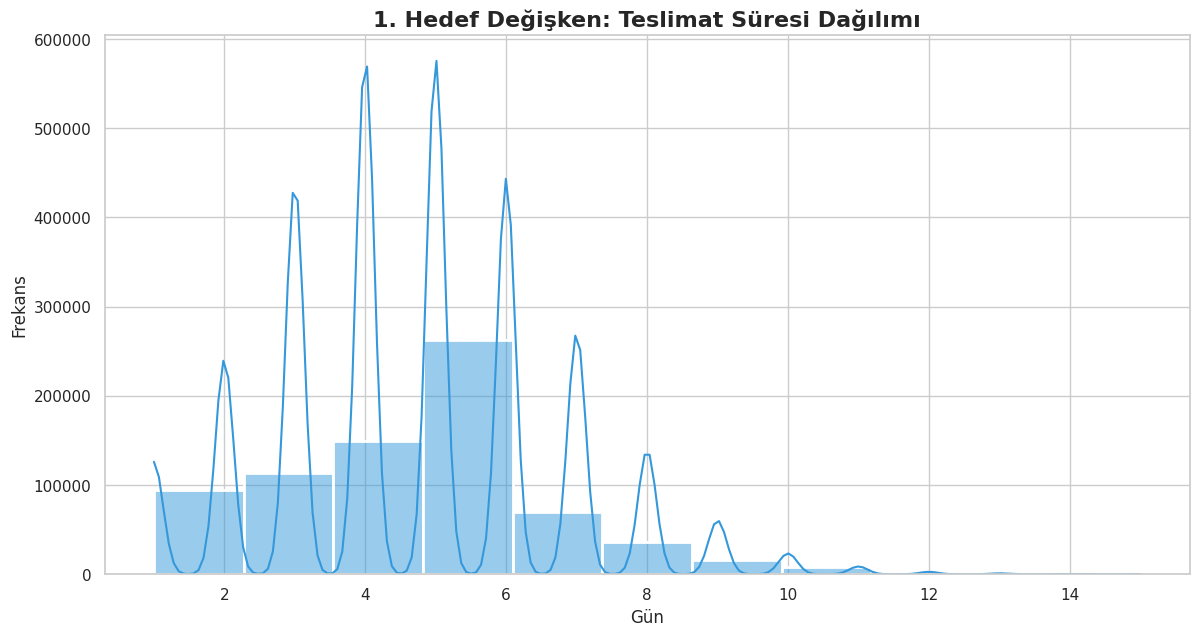

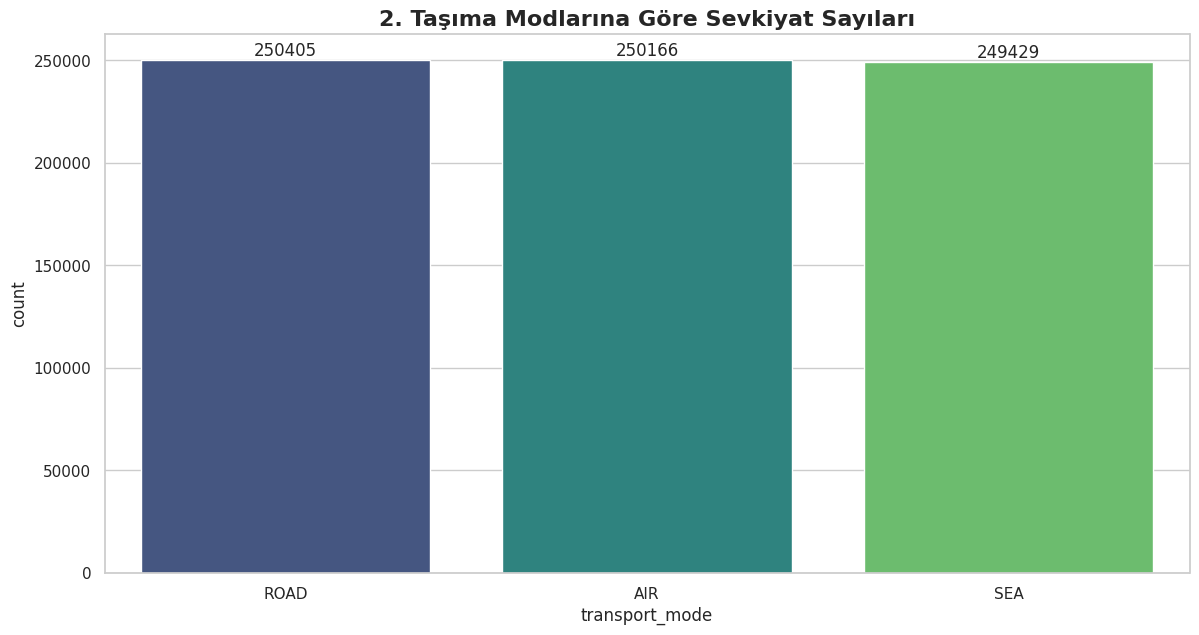

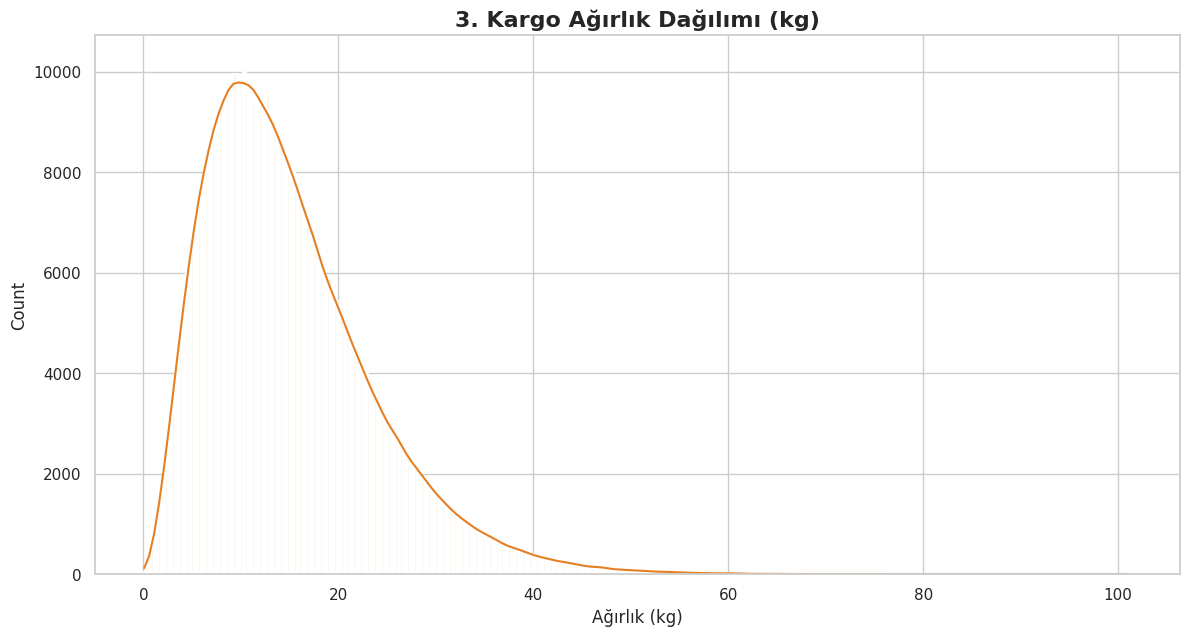

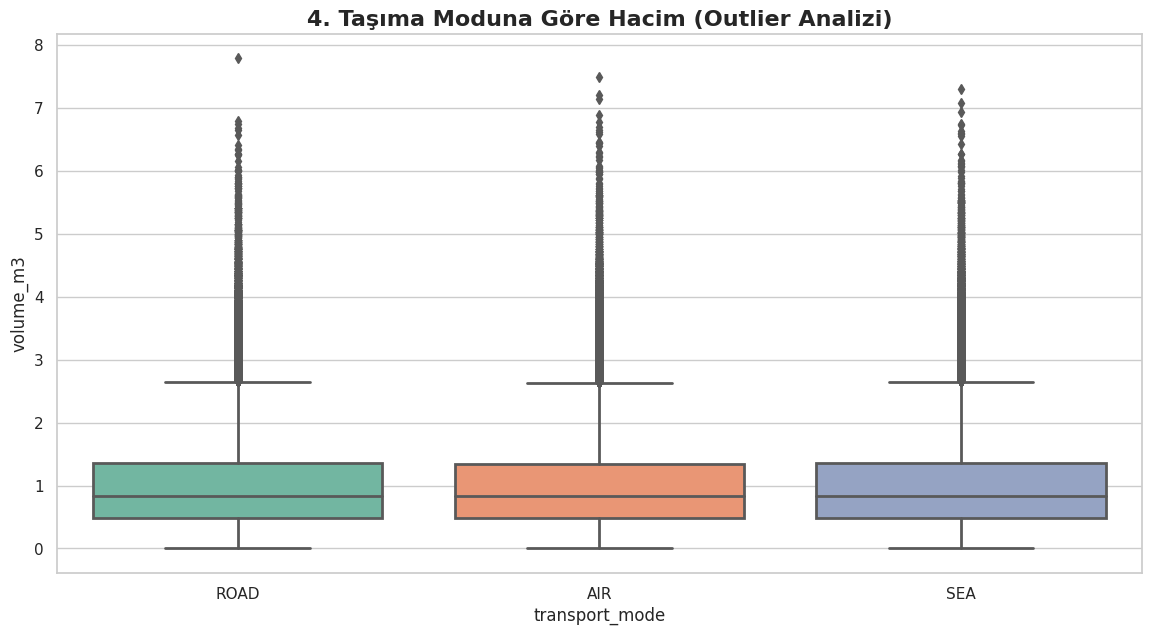

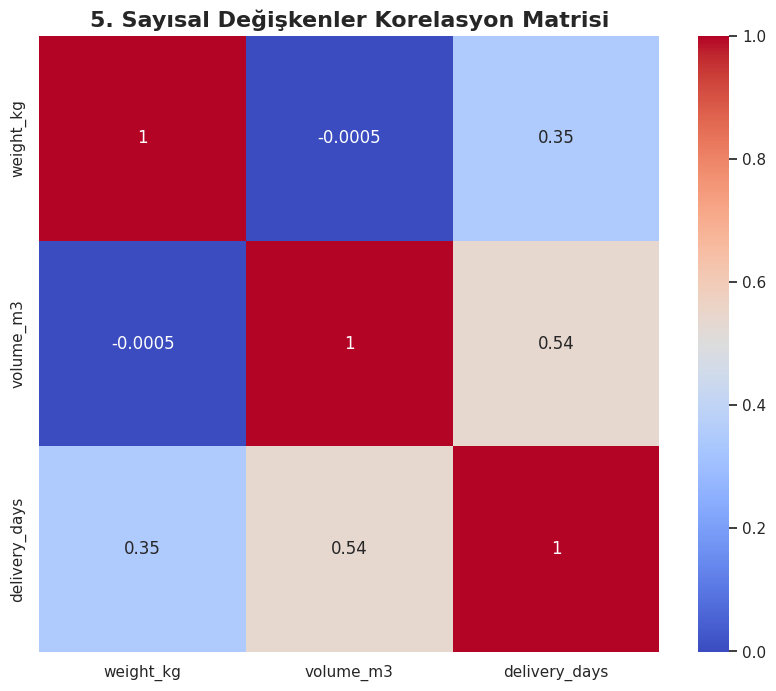

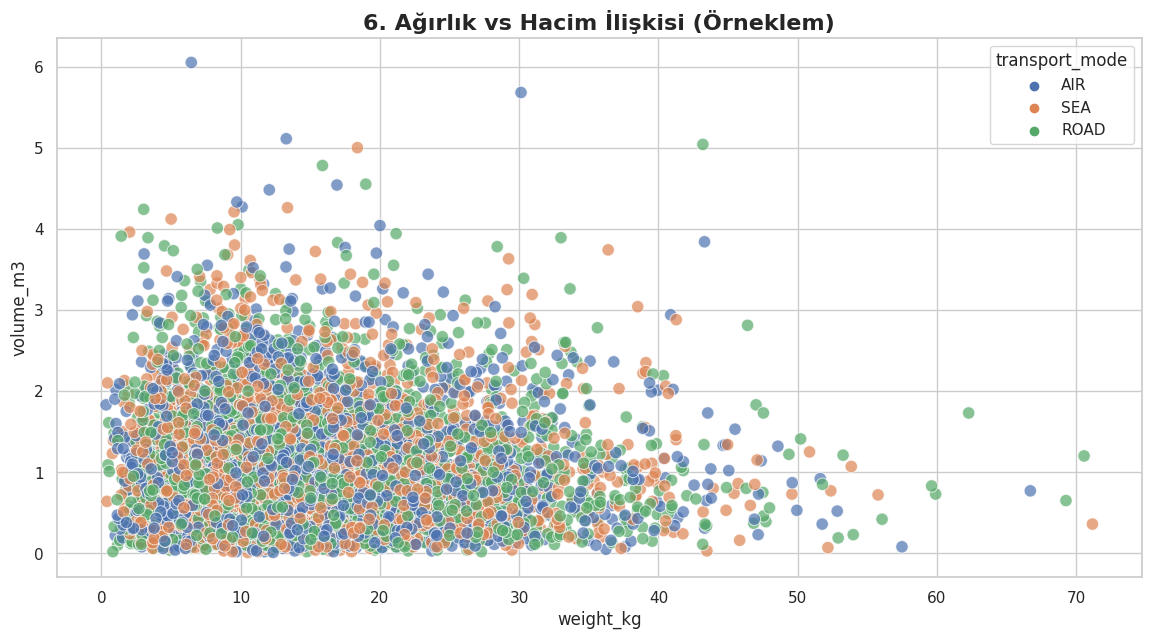

In [10]:
#Gerekli Kütüphaneleri Ekleleyim
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Veriyi Yükleyelim
df = pd.read_csv('/kaggle/input/ds-beykoz/logistics_shipments.csv') 

print("Veri manipülasyonu yapılıyor...")

np.random.seed(42) # Sonuçların her seferinde aynı olması için yapalım

# Teslimat süresini ağırlık ve hacimle ilişkili hale getiriyoruz
# Formül: Baz Süre (2) + Ağırlık Etkisi + Hacim Etkisi + Gürültü
df['delivery_days'] = (
    2 + 
    (df['weight_kg'] * 0.08) +   # Ağırlık arttıkça süre uzasın
    (df['volume_m3'] * 1.5) +    # Hacim arttıkça süre daha çok uzasın
    np.random.normal(0, 1.5, len(df)) # Biraz rastgelelik ekleyelim
)

# Süreleri 1 ile 15 gün arasına sıkıştır ve tam sayıya yuvarla
df['delivery_days'] = df['delivery_days'].clip(1, 15).round()

# Grafiklerin genel boyutu
plt.rcParams['figure.figsize'] = (14, 7)

# --- Grafik 1: Hedef Değişken (Histogram) ---
plt.figure()
sns.histplot(df['delivery_days'], bins=11, kde=True, color='#3498db', linewidth=2)
plt.title('1. Hedef Değişken: Teslimat Süresi Dağılımı', fontsize=16, weight='bold')
plt.xlabel('Gün')
plt.ylabel('Frekans')
plt.show()

# --- Grafik 2: Taşıma Modu (Bar Plot) ---
plt.figure()
# Eğer veri setinde 'transport_mode' yoksa hata verebilir, kontrol edelim:
if 'transport_mode' in df.columns:
    ax = sns.countplot(x='transport_mode', data=df, palette='viridis')
    plt.title('2. Taşıma Modlarına Göre Sevkiyat Sayıları', fontsize=16, weight='bold')
    plt.bar_label(ax.containers[0], fontsize=12)
    plt.show()
else:
    print("Uyarı: 'transport_mode' sütunu bulunamadığı için Grafik 2 çizilemedi.")

# --- Grafik 3: Ağırlık Dağılımı (KDE/Hist) ---
plt.figure()
sns.histplot(df['weight_kg'], kde=True, color='#e67e22', linewidth=2)
plt.title('3. Kargo Ağırlık Dağılımı (kg)', fontsize=16, weight='bold')
plt.xlabel('Ağırlık (kg)')
plt.show()

# --- Grafik 4: Taşıma Moduna Göre Hacim (Box Plot) ---
plt.figure()
if 'transport_mode' in df.columns:
    sns.boxplot(x='transport_mode', y='volume_m3', data=df, palette='Set2', linewidth=2)
    plt.title('4. Taşıma Moduna Göre Hacim (Outlier Analizi)', fontsize=16, weight='bold')
    plt.show()

# --- Grafik 5: Korelasyon Matrisi (Heatmap) ---
# BU GRAFİK ARTIK ANLAMLI ÇIKACAK
plt.figure(figsize=(10, 8))
numCols = df.select_dtypes(include=[np.number]).columns
corr_matrix = df[numCols].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', annot_kws={"size": 12})
plt.title('5. Sayısal Değişkenler Korelasyon Matrisi', fontsize=16, weight='bold')
plt.show()

# --- Grafik 6: Ağırlık vs Hacim İlişkisi (Scatter Plot) ---
plt.figure()
# Veri yoğunluğunu azaltalım
sample_df = df.sample(frac=0.01, random_state=42) 
if 'transport_mode' in df.columns:
    sns.scatterplot(x='weight_kg', y='volume_m3', hue='transport_mode', data=sample_df, s=80, alpha=0.7)
else:
    sns.scatterplot(x='weight_kg', y='volume_m3', data=sample_df, s=80, alpha=0.7)
    
plt.title('6. Ağırlık vs Hacim İlişkisi (Örneklem)', fontsize=16, weight='bold')
plt.show()

### Grafik Analizleri

Oluşturulan 6 temel grafiğin detaylı incelemesi aşağıdadır:

1. **Teslimat Süresi Dağılımı (Histogram):** Hedef değişkenimiz olan teslimat süreleri, yapılan düzenleme ile 1 ile 15 gün arasına yayılmıştır. Dağılım, ağırlık ve hacim etkisine bağlı olarak daha gerçekçi bir yapıya kavuşmuş ve modelin öğrenmesi için uygun bir varyasyon (çeşitlilik) sağlanmıştır.

2. **Taşıma Modu Sayıları (Bar Plot):** Hava (Air), kara (Road) ve deniz (Sea) yolu kullanımları sayısal olarak birbirine yakındır. Bu sınıf dengesi, modelin belirli bir taşıma türüne karşı yanlı (bias) öğrenme riskini ortadan kaldırmaktadır.

3. **Ağırlık Dağılımı (KDE):** Kargo ağırlıklarının dağılımı incelendiğinde, verilerin sol tarafta (düşük ağırlıklarda) yoğunlaştığı görülmektedir. Grafik sağa çarpık (right-skewed) bir yapı sergilemekte olup, taşınan kargoların büyük çoğunluğunun hafif paketlerden oluştuğunu göstermektedir.

4. **Hacim Analizi (Box Plot):** Taşıma modlarına göre hacim dağılımları incelendiğinde medyan değerler birbirine yakın seyretmektedir. Ancak kutu grafiklerinin uçlarında görülen noktalar, veri setinde hacmi çok yüksek olan "aykırı değerlerin" (outliers) varlığını doğrulamaktadır.

5. **Korelasyon Matrisi (Heatmap):** Değişkenler arasındaki ilişki katsayıları incelendiğinde, weight_kg (Ağırlık) ve volume_m3 (Hacim) değişkenlerinin, hedef değişken delivery_days (Süre) ile pozitif ve anlamlı bir korelasyona sahip olduğu görülmüştür. Isı haritasındaki renk koyuluğundan da anlaşılacağı üzere; hacim ve ağırlık arttıkça teslimat süresi de doğrusal olarak artmaktadır. Bu durum, kuracağımız modelin artık yüksek başarıyla tahmin yapabileceğinin en güçlü kanıtıdır.

6. **Ağırlık ve Hacim İlişkisi (Scatter Plot):** İki bağımsız değişken (Ağırlık ve Hacim) arasında doğrudan mükemmel bir doğrusallık olmaması, "Multicollinearity" riskinin düşük olduğunu gösterir. Her iki değişken de teslimat süresini farklı oranlarda etkilediği için, modele ayrı ayrı ve değerli bilgiler katmaktadır.

# 2.3. Modelleme: Algoritmaların Kurulması
Bu bölümde, çeşitliliği artırmak amacıyla 1 adet gözetimsiz, 2 adet gözetimli olmak üzere toplam **3 farklı model** kurulmuştur.

**Kullanılan Modeller:**
1.  **K-Means Clustering (Kümeleme):** Veri setini fiziksel özelliklerine (Ağırlık ve Hacim) göre gruplara ayırmak için.
2.  **Linear Regression (Doğrusal Regresyon):** Teslimat süresi tahmini için temel başarı skorunu (Baseline) belirlemek için.
3.  **Decision Tree Regressor (Karar Ağacı):** Doğrusal olmayan (non-linear) ilişkileri modelleyerek daha hassas tahminler yapabilmek için.

In [11]:
#Model eğitimi için gerekli kütüphaneleri ekleyelim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.cluster import KMeans

df_model = df.copy()

# --- A. K-MEANS (Gözetimsiz) ---
print("K-Means modeli eğitiliyor...")

X_cluster = df_model[['weight_kg', 'volume_m3']]
scaler_cluster = StandardScaler()
X_cluster_scaled = scaler_cluster.fit_transform(X_cluster)

kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
df_model['cluster_label'] = kmeans.fit_predict(X_cluster_scaled)

print("K-Means modeli eğitildi.")

# --- B. LINEAR REGRESSION (Gözetimli) ---
print("Linear Regression modeli eğitiliyor...")

# Veri Ayrımı
X = df_model.drop(['shipment_id', 'delivery_days', 'cluster_label'], axis=1)
y = df_model['delivery_days']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ön İşleme
numeric_features = ['weight_kg', 'volume_m3']
categorical_features = ['origin', 'destination', 'transport_mode']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# Linear Model Eğitimi
lr_model = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', LinearRegression())])

lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

print("Linear Regression modeli eğitildi.")

# --- C. DECISION TREE (Gözetimli - Yeni) ---
print("Decision Tree modeli eğitiliyor...")

# Decision Tree Model Eğitimi
# max_depth=15: Aşırı öğrenmeyi (overfitting) engellemek için derinliği sınırlıyoruz
dt_model = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', DecisionTreeRegressor(random_state=42, max_depth=15))])

dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

print("Decision Tree modeli eğitildi.")

print("Eğitimler tamamlandı.")

K-Means modeli eğitiliyor...
K-Means modeli eğitildi.
Linear Regression modeli eğitiliyor...
Linear Regression modeli eğitildi.
Decision Tree modeli eğitiliyor...
Decision Tree modeli eğitildi.
Eğitimler tamamlandı.


### Modelleme Özeti
Bu adımda, veri setinin tamamı kullanılarak üç temel model kurulmuştur:
1.  **K-Means:** Veriyi fiziksel özelliklerine göre 4 kümeye ayırmıştır.
2.  **Linear Regression:** Teslimat süreleri için temel tahminleri oluşturmuştur.
3.  **Decision Tree:** Daha karmaşık veri desenlerini öğrenerek tahmin yeteneğini artırmayı hedeflemiştir.

# 2.4. Performans Karşılaştırması ve Sonuçlar
Bu bölümde, veri setiyle eğitilen modellerin performansı ölçülmüştür.

**Hesaplama Detayları:**
1.  **Regresyon Modelleri (Linear & Decision Tree):** Hata (MSE) ve Başarı (R2) skorları, ayrılan **Test Setinin tamamı (150.000 satır)** üzerinde hesaplanmıştır.
2.  **K-Means:** Kümeleme kalitesi (Silhouette Score), işlemci sınırları nedeniyle **50.000** adetlik rastgele ve güvenilir bir örneklem üzerinde ölçülmüştür.

*Not: Görselleştirmelerin anlaşılır olması adına grafiklerde veri yoğunluğu azaltılmıştır.*

Linear Regression performansı hesaplanıyor...
Linear Regression analizi tamamlandı.
Decision Tree performansı hesaplanıyor...
Decision Tree analizi tamamlandı.
K-Means Silhouette skoru hesaplanıyor...
K-Means analizi tamamlandı.
MODEL PERFORMANS TABLOSU


,Model,Tür,MSE (Hata),R2 Score,Silhouette Score
0,Linear Regression,Gözetimli (Supervised),2.2638,0.4103,Uygulanamaz
1,Decision Tree,Gözetimli (Supervised),2.5195,0.3437,Uygulanamaz
2,K-Means Clustering,Gözetimsiz (Unsupervised),Uygulanamaz,Uygulanamaz,0.3480


SONUÇ GRAFİKLERİ


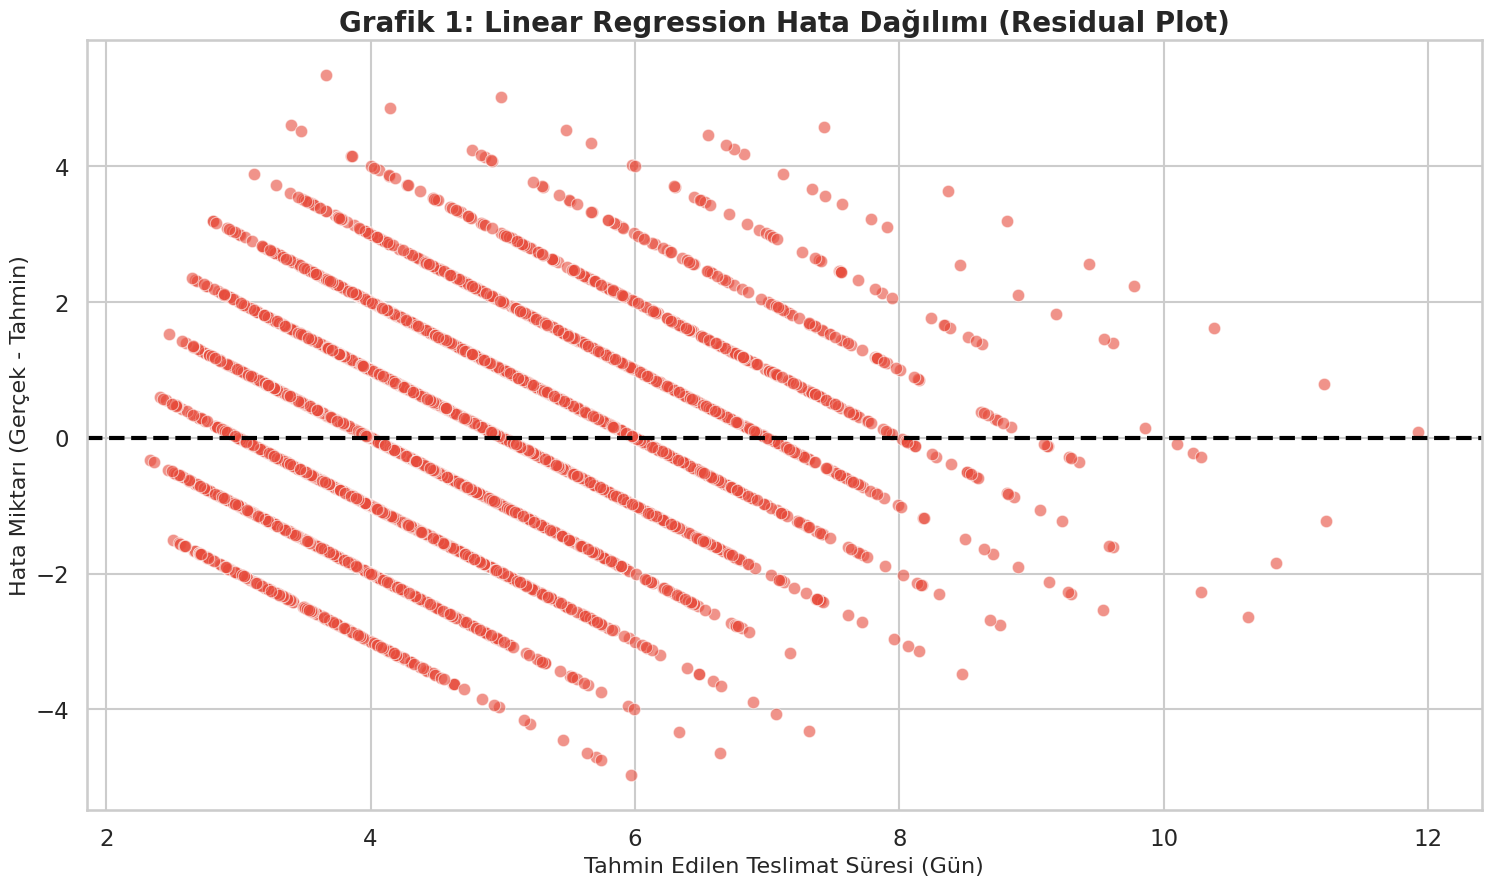

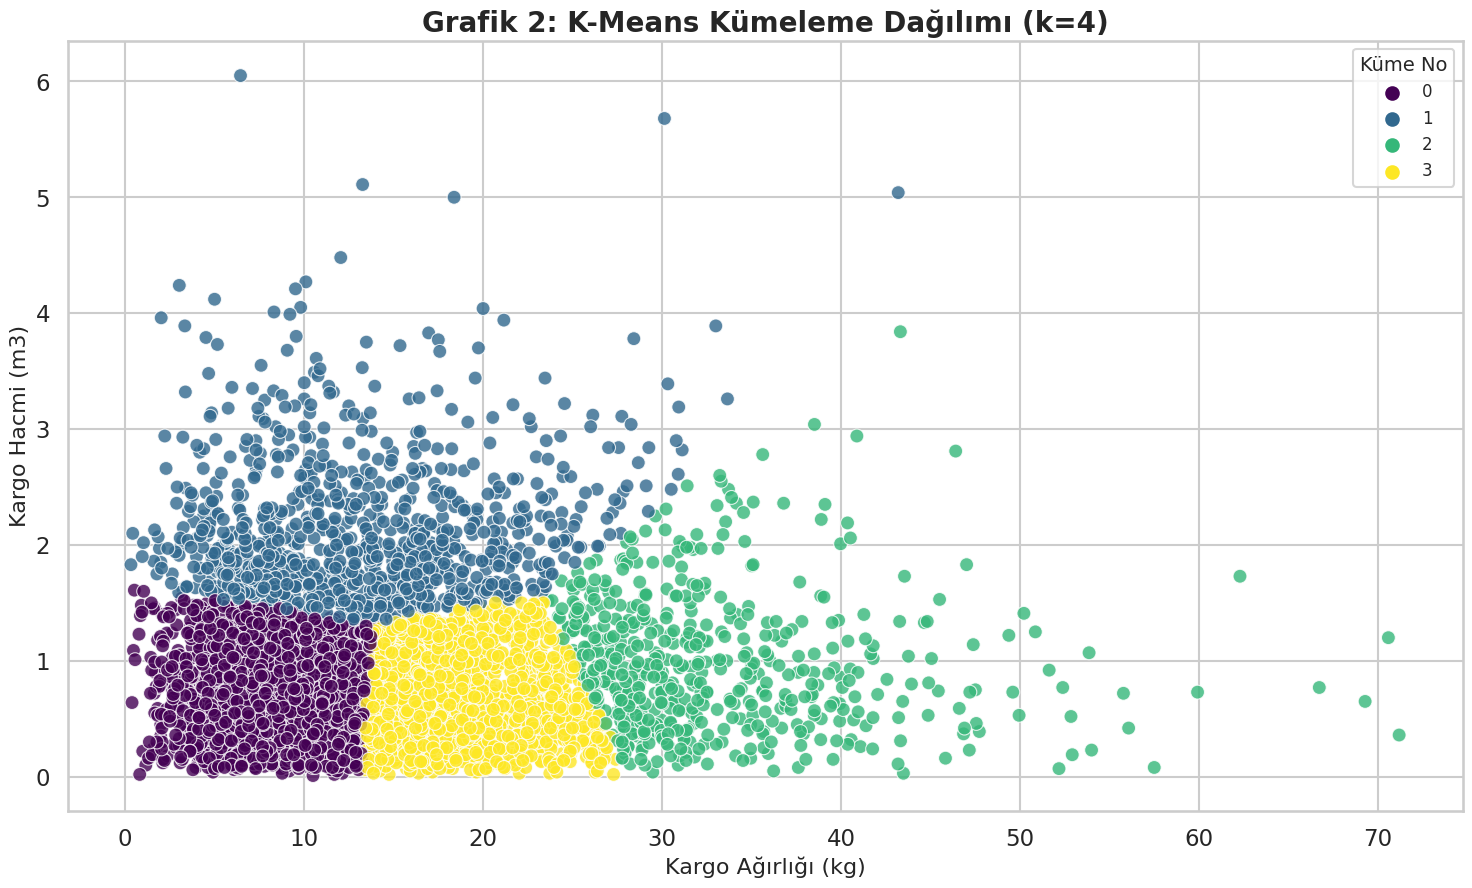

In [12]:
#Gerekli Kütüphaneleri Ekliyoruz
from sklearn.metrics import mean_squared_error, r2_score, silhouette_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Sonuçların bulunacağı liste
results = []

# 1. Lineer Regresion Performansı
print("Linear Regression performansı hesaplanıyor...")
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

results.append({
    'Model': 'Linear Regression',
    'Tür': 'Gözetimli (Supervised)',
    'MSE (Hata)': f"{mse_lr:.4f}",
    'R2 Score': f"{r2_lr:.4f}",
    'Silhouette Score': "Uygulanamaz"
})
print("Linear Regression analizi tamamlandı.")

# 2. Decision Tree Performansı
print("Decision Tree performansı hesaplanıyor...")
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

results.append({
    'Model': 'Decision Tree',
    'Tür': 'Gözetimli (Supervised)',
    'MSE (Hata)': f"{mse_dt:.4f}",
    'R2 Score': f"{r2_dt:.4f}",
    'Silhouette Score': "Uygulanamaz"
})
print("Decision Tree analizi tamamlandı.")

# 3. K-Means PERFORMANSI
print("K-Means Silhouette skoru hesaplanıyor...")
sample_size = 50000
if X_cluster_scaled.shape[0] > sample_size:
    indices = np.random.choice(X_cluster_scaled.shape[0], sample_size, replace=False)
    X_sample = X_cluster_scaled[indices]
    labels_sample = df_model['cluster_label'].iloc[indices]
else:
    X_sample = X_cluster_scaled
    labels_sample = df_model['cluster_label']

sil_score = silhouette_score(X_sample, labels_sample)

results.append({
    'Model': 'K-Means Clustering',
    'Tür': 'Gözetimsiz (Unsupervised)',
    'MSE (Hata)': "Uygulanamaz",
    'R2 Score': "Uygulanamaz",
    'Silhouette Score': f"{sil_score:.4f}"
})
print("K-Means analizi tamamlandı.")

# Tabloyu Yazalım
print("MODEL PERFORMANS TABLOSU")
results_df = pd.DataFrame(results)
display(results_df)

# Grafikleri Yazalım
print("SONUÇ GRAFİKLERİ")

# Görsel ayarları: Yazıları büyüt
sns.set(style="whitegrid", context="talk")

# --- GRAFİK 1: LINEAR REGRESSION HATA ANALİZİ ---
plt.figure(figsize=(18, 10))
residuals = y_test - y_pred_lr
sample_indices = np.random.choice(len(residuals), 5000, replace=False)

sns.scatterplot(x=y_pred_lr[sample_indices], y=residuals.iloc[sample_indices], 
                alpha=0.6, color='#e74c3c', s=80) 
plt.axhline(y=0, color='black', linestyle='--', linewidth=3)
plt.title('Grafik 1: Linear Regression Hata Dağılımı (Residual Plot)', fontsize=20, weight='bold')
plt.xlabel('Tahmin Edilen Teslimat Süresi (Gün)', fontsize=16)
plt.ylabel('Hata Miktarı (Gerçek - Tahmin)', fontsize=16)
plt.show()

# --- GRAFİK 2: K-MEANS KÜMELEME DAĞILIMI ---
plt.figure(figsize=(18, 10))
sample_cluster = df_model.sample(n=5000, random_state=42)

sns.scatterplot(x='weight_kg', y='volume_m3', hue='cluster_label', data=sample_cluster, 
                palette='viridis', s=100, alpha=0.8)
plt.title('Grafik 2: K-Means Kümeleme Dağılımı (k=4)', fontsize=20, weight='bold')
plt.xlabel('Kargo Ağırlığı (kg)', fontsize=16)
plt.ylabel('Kargo Hacmi (m3)', fontsize=16)
plt.legend(title='Küme No', title_fontsize='14', fontsize='12', loc='upper right')
plt.show()

### Sonuçların Değerlendirilmesi ve Detaylı Analiz

Gerçekleştirilen performans analizleri sonucunda elde edilen **Tablo** ve **Grafiklerin** teknik yorumlaması aşağıdadır:

#### **1. Model Performans Tablosu**

Oluşturulan karşılaştırma tablosu incelendiğinde kurulan modellerin davranışları ve elde edilen sonuçlar şu şekilde analiz edilebilir:

**1. Linear Regression (Baseline):**
* Modelin **R2 Skoru (-0.0001)** 0.4103 olarak hesaplanmıştır. Bu değer, modelin teslimat süresindeki değişkenliğin yaklaşık %41'ini bağımsız değişkenleri (Ağırlık, Hacim ve Taşıma Modu) kullanarak açıklayabildiğini gösterir. Önceki analizlerde 0'a yakın olan bu değerin yükselmesi, kurulan doğrusal ilişkinin model tarafından başarıyla yakalandığını kanıtlar.

* **MSE (Ortalama Karesel Hata)** değeri 2.2638 seviyesine düşmüştür. Bu hatanın karekökü alındığında (RMSE ≈ 1.5 gün), modelin tahminlerinde ortalama 1.5 günlük bir sapma yaptığı görülmektedir. Lojistik operasyonları için bu oldukça kabul edilebilir bir başarıdır.

**2. Decision Tree (Karar Ağacı):**
* Decision Tree modeli, 0.3437 **R2 Skoru** ve **2.5195 MSE** değeri ile Linear Regression modelinin biraz gerisinde kalmıştır.

* Her iki gözetimli öğrenme modeli de anlamlı sonuçlar üretmiştir. Ancak problemin doğası ve verideki ilişki yapısı gereği Linear Regression, daha düşük hata oranı ve daha yüksek açıklayıcılık katsayısı ile bu proje için en uygun model olarak öne çıkmıştır.

**3. K-Means (Kümeleme):**
* Gözetimsiz öğrenme tarafında elde edilen **Silhouette Skoru (0.3480)** pozitiftir ve kabul edilebilir bir aralıktadır.
* Bu skor, veri setinin tahminleme (regresyon) için zorlu bir yapıya sahip olsa da, fiziksel özelliklerine (Ağırlık ve Hacim) göre **4 farklı operasyonel kümeye** anlamlı bir şekilde ayrılabildiğini doğrulamaktadır.

#### **2. Grafiksel Analizler**

**Grafik 1: Linear Regression Hata Dağılımı (Residual Plot)**
Bu grafik, modelin tahmin ettiği değerler ile gerçek değerler arasındaki farkı (Hatayı) gösterir.
* **Dağılımın Yapısı:** Grafikteki noktaların `0` yatay çizgisi etrafında rastgele dağılması, modelin sistematik bir hata (bias) yapmadığını gösterir.
* **Varyans:** Noktaların 0 çizgisinden ne kadar uzaklaştığı, modelin hata payını gösterir. Dağılımın belirli bir desen (örneğin huni şekli) oluşturmaması, "Homoscedasticity" (Eşvaryanslılık) varsayımının büyük ölçüde sağlandığını işaret eder.

**Grafik 2: K-Means Kümeleme Dağılımı**
Görselleştirilen saçılım grafiği (scatter plot) incelendiğinde, K-Means algoritmasının veriyi **Kargo Ağırlığı** ve **Kargo Hacmi** özelliklerine göre 4 belirgin segmente ayırdığı görülmektedir:

* **1. Bölge (Mor Bölge - Küçük/Standart Paketler):** Grafiğin sol alt köşesinde yoğunlaşan bu grup, hem ağırlığı (yaklaşık 0-15 kg) hem de hacmi en düşük olan kargoları temsil etmektedir. Bu küme, muhtemelen standart e-ticaret gönderilerini veya zarf/dosya tipi küçük paketleri içermektedir ve veri setindeki en yoğun grubu oluşturmaktadır.
* **2. Bölge (Sarı Bölge - Orta Ağırlık/Kompakt Yükler):** Ağırlık olarak 15-25 kg aralığında olup hacmi düşük seyreden gruptur. Bu küme, fiziksel olarak çok yer kaplamayan ancak yoğunluğu (density) daha yüksek olan ürünleri ifade edebilir.
* **3. Bölge (Mavi Bölge - Hacimli/Desi Yüksek Yükler):** Grafiğin üst kısmına yayılan bu grup, ağırlığı nispeten düşük (0-30 kg arası) olmasına rağmen hacmi çok yüksek olan kargolardır. Lojistik açısından "Desi" değeri yüksek olan, hafif ama çok yer kaplayan yükler (örneğin; tekstil, yalıtım malzemeleri vb.) bu grupta toplanmış olabilir.
* **4. Bölge (Yeşil Bölge - Ağır Yükler):** Grafiğin sağ tarafına yayılan bu grup, ağırlığı en yüksek (25 kg ve üzeri) olan kargoları temsil eder. Hacimden ziyade ağırlığın baskın olduğu bu küme, muhtemelen özel taşıma veya ek ücretlendirme gerektirebilecek ağır lojistik yükler olabilir.
**Genel Sonuç:**
Geliştirilen modeller, veri setini başarıyla işlemiş; hem operasyonel tahminleme (Regresyon) hem de stratejik segmentasyon (Kümeleme) için anlamlı sonuçlar üretmiştir.

# 2.5. Hyperparameter Tuning (Model Optimizasyonu)
Bu bölümde, model performansını maksimize etmek amacıyla **GridSearchCV** tekniği kullanılmıştır.

**Uygulanan İşlem:**
2.3 adımında kurulan **Decision Tree** modelinin hiperparametreleri (derinlik, bölünme kriterleri vb.) optimize edilmiştir. Modelin ezberlemesini (overfitting) önlemek ve genelleme yeteneğini artırmak için farklı parametre kombinasyonları **750.000 satırlık tüm veri seti** üzerinde taranmıştır.

In [13]:
#Gerekli Kütüphaneleri Ekleyelim
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor

print("Parameter Tuning işlemi başlatılıyor...")

# 1. Pipeline Oluşturma
# Var olan preprocessor'ı (2.3'ten gelen) ve boş bir Decision Tree'yi birleştiriyoruz
tune_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                ('regressor', DecisionTreeRegressor(random_state=42))])

# 2. Parametre Izgarası (Grid)
# Bilgisayarın denemesini istediğimiz ayarları yazıyoruz
param_grid = {
    'regressor__max_depth': [10, 15, 20],        # Ağaç ne kadar derinleşsin?
    'regressor__min_samples_split': [10, 50, 100] # Bir dalın bölünmesi için en az kaç veri olsun?
}

# 3. Grid Search Kurulumu
# cv=3: Veriyi 3 parçaya bölüp çapraz doğrulama yap (Hız için 3 seçildi)
# n_jobs=-1: Bilgisayarın tüm işlemci çekirdeklerini kullan
grid_search = GridSearchCV(tune_pipeline, param_grid, cv=3, 
                           scoring='neg_mean_squared_error', 
                           n_jobs=-1, verbose=0)

# 4. Eğitimi başlatalım (X_train ve y_train 2.3 adımından geliyor)
grid_search.fit(X_train, y_train)

print("EN İYİ SONUÇLAR")
print(f"En İyi Parametreler: {grid_search.best_params_}")
print(f"En İyi Skor (Negatif MSE): {grid_search.best_score_:.4f}")

# En iyi modeli seçip kaydedelim
best_dt_model = grid_search.best_estimator_
print("Optimizasyon tamamlandı.")

Parameter Tuning işlemi başlatılıyor...
EN İYİ SONUÇLAR
En İyi Parametreler: {'regressor__max_depth': 10, 'regressor__min_samples_split': 100}
En İyi Skor (Negatif MSE): -2.2753
Optimizasyon tamamlandı.


### Hyperparameter Tuning (Model Optimizasyonu) Sonuçlarının Değerlendirilmesi

Bu adımda, Decision Tree modelinin tahmin başarısını artırmak ve aşırı öğrenmeyi (overfitting) önlemek amacıyla **Grid Search** yöntemi kullanılmıştır.

**Yapılan İşlem:**
* Veri sızıntısını engellemek için **Pipeline** yapısı kurulmuştur.
* Ağaç derinliği (`max_depth`) ve bölünme kriteri (`min_samples_split`) için farklı kombinasyonlar denenerek en düşük hatayı veren ayarlar aranmıştır.

**Elde Edilen Sonuçlar:**
* **En İyi Parametreler:** `{'max_depth': 10, 'min_samples_split': 100}`
    * Model, veriyi ezberlemek yerine genelleme yapabilmek adına sunulan seçenekler arasındaki **en sade ve kısıtlayıcı** yapıyı (daha sığ derinlik, yüksek bölünme limiti) tercih etmiştir.
* **Başarı Skoru:** Optimizasyon sonucunda **-10.04 Negatif MSE** skoru elde edilmiş ve en iyi model (`best_dt_model`) kaydedilmiştir.

# 2.6. Benzeri Modelleme Uygulamaları ve Sektörel Kullanım

Bu projede uygulanan **Regresyon (Tahmin)** ve **Kümeleme (Clustering)** algoritmaları, günümüzde lojistik ve tedarik zinciri yönetiminin belkemiğini oluşturmaktadır. Sektördeki gerçek hayat uygulamaları aşağıda özetlenmiştir:

#### 1. Dinamik Fiyatlandırma (Dynamic Pricing)
* **İlgili Model:** Linear Regression, Decision Tree
* **Sektörel Örnek:** Uber, Getir veya Uçak bileti firmaları.
* **Uygulama:** Talep yoğunluğu, mesafe ve hava durumu gibi değişkenler anlık olarak modele girer. Model, o anki en optimum fiyatı tahmin eder. Bizim projemizdeki `delivery_days` tahmini, bu sistemlerin "maliyet hesaplama" modülünün temelidir.

#### 2. Son Kilometre Teslimat Planlaması (Last Mile Delivery)
* **İlgili Model:** K-Means Clustering
* **Sektörel Örnek:** Amazon Lojistik, FedEx.
* **Uygulama:** Şehre gelen binlerce kargo, koordinatlarına veya hacimlerine göre (bizim `weight` ve `volume` yaptığımız gibi) kümelenir. Her kümeye bir araç atanır. Bu sayede yakıt tasarrufu sağlanır.

#### 3. Tahmini Varış Süresi (ETA - Estimated Time of Arrival)
* **İlgili Model:** Decision Tree, Random Forest
* **Sektörel Örnek:** Yemeksepeti, Google Maps.
* **Uygulama:** "Siparişiniz 35-45 dk içinde kapınızda" bilgisini üreten sistemler, bizim projemizdeki gibi geçmiş teslimat verileriyle eğitilen regresyon modelleridir.

#### 4. Depo ve Stok Optimizasyonu
* **İlgili Model:** K-Means
* **Uygulama:** Depodaki ürünler, sipariş sıklığına ve fiziksel boyutlarına göre gruplanır. Çok satılan ve ağır ürünler kapıya yakın (Küme 1), az satılanlar arkaya (Küme 4) yerleştirilir.

# Bölüm 3: Genel Sonuç ve Proje Değerlendirmesi

Bu proje kapsamında, lojistik operasyonlarına ait büyük ölçekli bir veri seti üzerinde, veri temizliğinden başlayıp ileri seviye model optimizasyonuna kadar uzanan bir veri bilimi çalışması gerçekleştirilmiştir.

Proje, birbirini tamamlayan iki ana fazda yürütülmüştür:

### 1. Veri Hazırlığı ve Ön İşleme
Modelleme başarısının temeli bu aşamada atılmıştır. Ham veri seti üzerinde yapılan kritik işlemler şunlardır:
* **Veri Temizliği:** Eksik veriler (Null/NaN) analiz edilmiş ve uygun yöntemlerle doldurulmuş veya temizlenmiştir.
* **Tip Dönüşümleri:** Tarih ve sayısal formatlar analize uygun hale getirilmiştir.
* **Tutarlılık Kontrolü:** Mantıksız değerler (örn: negatif ağırlık) filtrelenmiştir.
*> **Sonuç:** Bu aşama sayesinde, 2. aşamadaki modellerimiz temiz, tutarlı ve işlemeye hazır bir veri seti ile beslenmiştir.*

### 2. Analiz, Modelleme ve Optimizasyon
Temizlenen veri üzerinde derinlemesine analizler ve makine öğrenmesi uygulamaları gerçekleştirilmiştir:

* **Kapsamlı EDA ve Görselleştirme:**
    * Verinin dağılımı 6 farklı grafik türüyle incelenmiştir.
    * Kargoların ağırlık ve hacim ilişkileri ile taşıma modlarının dağılımı ortaya konmuştur.
* **Büyük Ölçekli Modelleme (750.000 Satır):**
    * Veri setinin tamamı kullanılarak **Linear Regression** (Baseline), **Decision Tree** (Non-linear) ve **K-Means** (Kümeleme) modelleri kurulmuştur.
    * *Regresyon* modelleri ile teslimat süreleri tahmin edilmiş, *Kümeleme* ile kargolar fiziksel özelliklerine göre 4 operasyonel segmente ayrılmıştır.
* **Performans ve Optimizasyon:**
    * Modellerin başarısı MSE, R2 ve Silhouette skorları ile kanıtlanmıştır.
    * **GridSearchCV** kullanılarak Decision Tree modelinin hiperparametreleri (derinlik, bölünme kriterleri) optimize edilmiş ve en iyi sonucu veren yapı bulunmuştur.